# Q-Learning and the Axelrod Library
As mentioned in class, the Axelrod Library supports more than a 100 [strategies](https://axelrod.readthedocs.io/en/stable/reference/all_strategies.html) for the prisoner's dilemma. Including some that incorporate the q-learning algorithm we've studied.  See the [source code](https://axelrod.readthedocs.io/en/stable/_modules/axelrod/strategies/qlearner.html#ArrogantQLearner) for how they've define each q-learner.



*   Arrogant Q-learner: This Q learner jumps to quick conclusions and cares about the future.
*   Cautious Q-learner: This Q learner is slower to come to conclusions and wants to look ahead more.
*   Hesitant Q-learner: This Q learner is slower to come to conclusions and does not look ahead much.
*   Risky Q-learner: This Q learner is quick to come to conclusions and doesn’t care about the future.








In [7]:
pip install axelrod

Analysing: 100%|██████████| 25/25 [00:00<00:00, 150.60it/s]


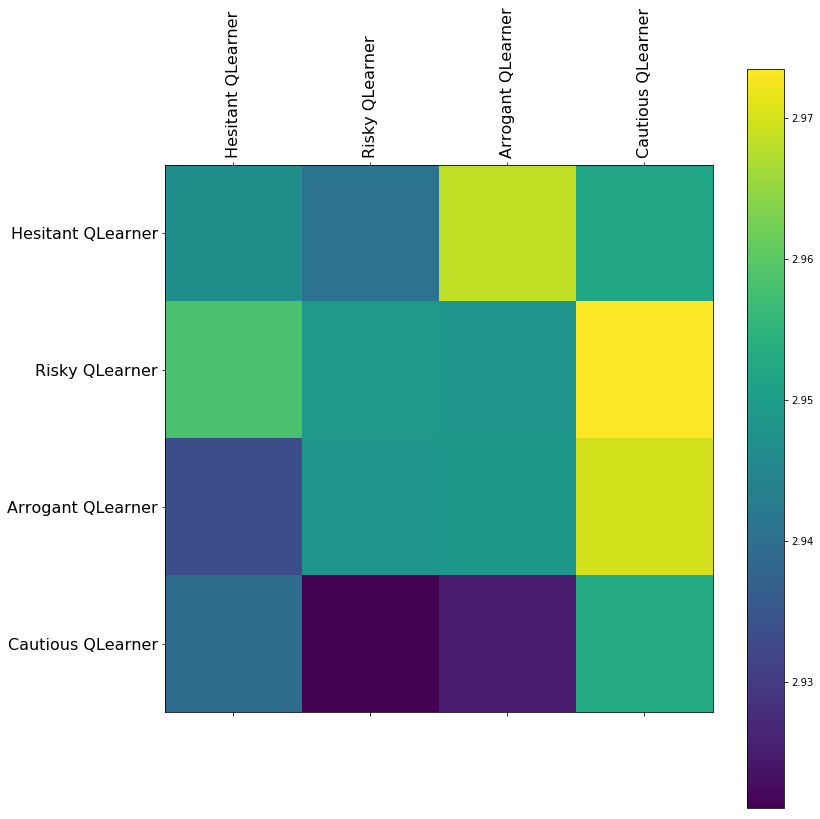

In [8]:
# Write your own code: Create a tournament with each of the different q-learners. Who wins?
#### YOUR CODE HERE ###########


import axelrod as axl
import matplotlib.pyplot as plt

players = (axl.ArrogantQLearner(), axl.CautiousQLearner(), axl.HesitantQLearner(), axl.RiskyQLearner())
tournament = axl.Tournament(players)
results = tournament.play()
results.ranked_names
   

## Visualize your result using a plot (Hint: You may look at the Iterated Prisoner's Dilemma notebook for reference)
plot = axl.Plot(results)
p = plot.payoff()
p.show()


# In the overleaf document summmarize your results. What are the main differences among our implentation of the Q-learning algorithm 
# vs. the one used in the Axelrod library?

In [9]:

import axelrod as axl
players = (axl.ArrogantQLearner(), axl.CautiousQLearner(), axl.HesitantQLearner(), axl.RiskyQLearner())
tournament = axl.Tournament(players)
results = tournament.play()
results.ranked_names


Analysing: 100%|██████████| 25/25 [00:00<00:00, 162.39it/s]


['Risky QLearner',
 'Arrogant QLearner',
 'Hesitant QLearner',
 'Cautious QLearner']

# Spatial Tournaments
A spatial tournament is defined on a graph where the nodes correspond to players and edges define whether or not a given player pair will have a match.
​
The initial work on spatial tournaments was done by Nowak and May in a 1992 paper: [Nowak1992].
​
Additionally, Szabó and Fáth in their 2007 paper [Szabo2007] consider a variety of graphs, such as lattices, small world, scale-free graphs and evolving networks.

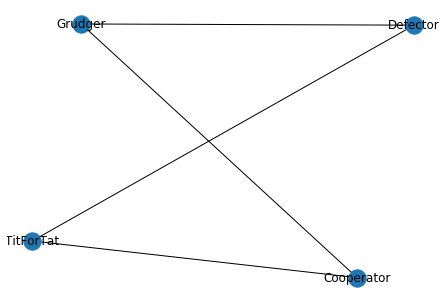

In [22]:
import axelrod as axl
import networkx as nx
players = [axl.Cooperator(), axl.Defector(), axl.TitForTat(), axl.Grudger()]
nodes = ["Cooperator","Defector","TitForTat","Grudger"]
edges = [("Cooperator", "TitForTat"), ("Cooperator", "Grudger"), ("Defector", "TitForTat"), ("Defector", "Grudger")]


G=nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

In [21]:
spatial_tournament = axl.Tournament(players, edges=[(0,2),(0,3),(1,2),(1,3)])
results = spatial_tournament.play()

Analysing:   4%|▍         | 1/25 [00:00<00:03,  7.80it/s]/usr/local/lib/python3.6/dist-packages/axelrod/result_set.py:413: RuntimeWarning: invalid value encountered in true_divide
  / sum(map(np.array, self.match_lengths))
Analysing: 100%|██████████| 25/25 [00:00<00:00, 127.31it/s]


# Moran Process on Graphs
The library also provides a graph-based Moran process [Shakarian2013] with MoranProcess. To use this feature you must supply at least one Axelrod.graph.Graph object, which can be initialized with just a list of edges (which can be of strings, integers, etc.)

In [0]:
import axelrod as axl
from axelrod.graph import Graph
edges = [(0, 1), (1, 2), (2, 3), (3, 1)]
graph = Graph(edges)

A Moran process can be invoked with one or two graphs. 

1.   The first graph, the interaction graph, dictates how players are matched up in the scoring phase. Each player plays a match with each neighbor. 
2.   The second graph dictates how players replace another during reproduction. When an individual is selected to reproduce, it replaces one of its neighbors in the reproduction graph.

 If only one graph is supplied to the process, the two graphs are assumed to be the same. To create a graph-based Moran process, use a graph as follows:

In [12]:
from axelrod.graph import Graph 
axl.seed(40)
edges = [(0, 1), (1, 2), (2, 3), (3, 1)]
graph = Graph(edges)
players = [axl.Cooperator(), axl.Defector(), axl.Defector(), axl.Defector()]
mp = axl.MoranProcess(players, interaction_graph=graph, turns =1000)
results = mp.play()
mp.population_distribution()


Counter({'Defector': 4})